In [1]:
import pandas as pd
import numpy as np

#Load the dataset
df = pd.read_csv('AutoInsurance - AutoInsurance.csv')

In [2]:
#Display first few rows
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#EDA
#Checking missing value
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [4]:
# Summary statistics for numerical columns
print(df.describe())

       Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000              

In [5]:
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Customer: 9134 unique values
State: 5 unique values
Response: 2 unique values
Coverage: 3 unique values
Education: 5 unique values
Effective To Date: 59 unique values
EmploymentStatus: 5 unique values
Gender: 2 unique values
Location Code: 3 unique values
Marital Status: 3 unique values
Policy Type: 3 unique values
Policy: 9 unique values
Renew Offer Type: 4 unique values
Sales Channel: 4 unique values
Vehicle Class: 6 unique values
Vehicle Size: 3 unique values


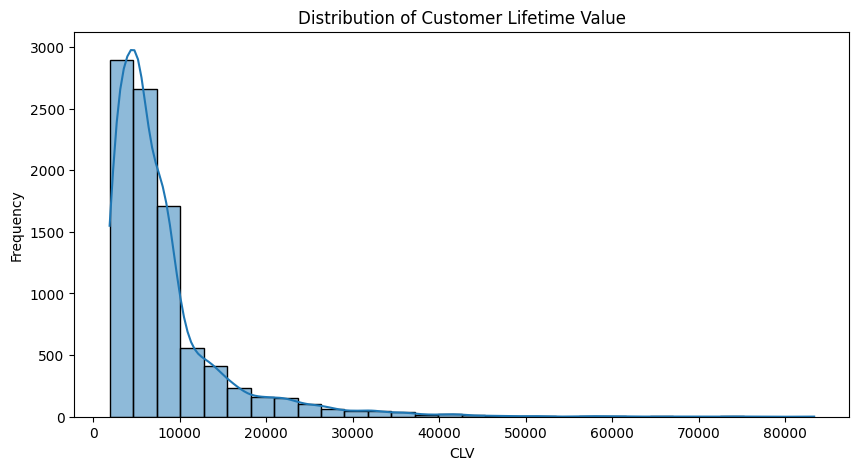

In [6]:
#Visualizing the Target Variable (CLV)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of CLV
plt.figure(figsize=(10, 5))
sns.histplot(df['Customer Lifetime Value'], bins=30, kde=True)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()

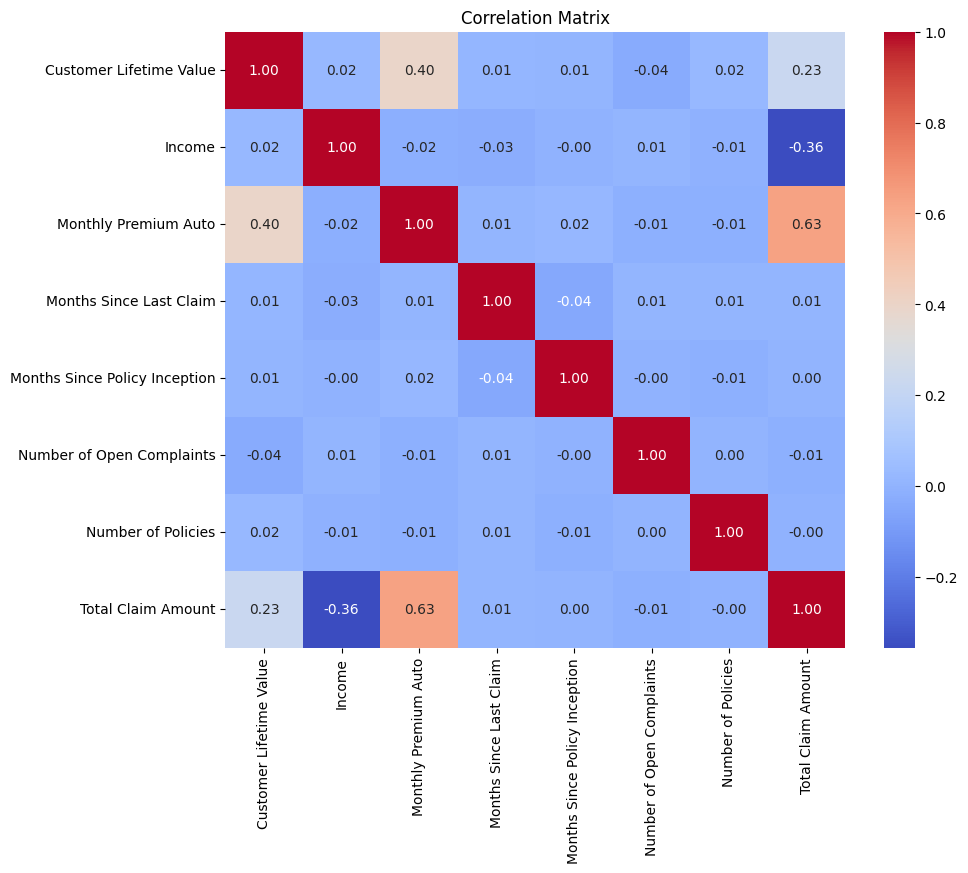

In [7]:
# Correlation matrix
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [8]:
#Handling Categorical and Numerical Features.
#We need to separate categorical and numerical columns for proper feature selection.
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Remove target variable (CLV) from numerical columns
numerical_cols = numerical_cols.drop('Customer Lifetime Value')

print("Categorical Columns:",categorical_cols)
print("Numerical Columns:",numerical_cols)

Categorical Columns: Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')
Numerical Columns: Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')


In [9]:
#Prepare Data for Training
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#creat x and Y variable
X = df.drop(columns=['Customer Lifetime Value'])
y = df['Customer Lifetime Value']

# Convert categorical columns into numerical using OneHotEncoder
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Train Different Regression Models
# Define models
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **Define Models**
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

#Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print Evaluation Metrics
    print(f"{name}:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R² Score: {r2_score(y_test, y_pred)}\n")

Linear Regression:
RMSE: 6612.312193994282
R² Score: 0.1516115116867779

Random Forest:
RMSE: 4131.848599770298
R² Score: 0.6687339983438095



In [11]:
sample_record = X_test.iloc[0].values.reshape(1, -1)
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
predicted_clv = best_model.predict(sample_record)
print("Predicted Customer Lifetime Value:", predicted_clv[0])

Predicted Customer Lifetime Value: 4248.538515329998


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
